<a href="https://colab.research.google.com/github/r-zambotti/Data_Analytics_Datathon_Grupo-60/blob/main/Data_Analytics_Datathon_Grupo_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datathon - Passos Mágicos**

## **1 - Introdução**

  ## **2 - 	Objetivo Geral**

## **3 - Material e Ferramentas**

## **4 - Importação dos dados**

- Instalação de pacotes

- Import das bibliotecas

In [171]:
import pandas as pd
import numpy as np
import unicodedata
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')



In [172]:
# ink do arquivo raw no GitHub
url = 'https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/refs/heads/main/Bases/PEDE_PASSOS_DATASET_FIAP.csv'

# Download do arquivo
!wget $url -O PEDE_PASSOS_DATASET_FIAP.csv

# Convertendo para DataFrame
df_pede = pd.read_csv('PEDE_PASSOS_DATASET_FIAP.csv', sep = ';')
df_pede.head()


--2025-01-28 03:47:49--  https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/refs/heads/main/Bases/PEDE_PASSOS_DATASET_FIAP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769554 (752K) [text/plain]
Saving to: ‘PEDE_PASSOS_DATASET_FIAP.csv’

PEDE_PASSOS_DATASET 100%[===================>] 751.52K  --.-KB/s    in 0.06s   

2025-01-28 03:47:49 (13.2 MB/s) - ‘PEDE_PASSOS_DATASET_FIAP.csv’ saved [769554/769554]



,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## **5 - Tratamento dos Dados**

In [173]:
df_pede.shape

(1349, 69)

In [174]:
df_pede.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [175]:
df_pede.describe()

,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,DEFASAGEM_2021,FASE_2022,...,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,IPV_2022,IAN_2022
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.00000,686.000000,686.000000,862.000000,...,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.000000,862.000000,862.000000,862.000000
mean,2.276968,8.153499,6.822595,6.843586,5.425948,7.576385,7.40758,6.902332,-0.752187,2.110209,...,7.880728,6.901102,6.070688,5.796318,6.306628,5.839942,3.056845,6.299364,7.247953,6.421114
std,1.798368,2.193629,2.458627,1.457148,2.141566,1.072318,1.62708,2.484979,0.792181,1.802222,...,1.649023,1.070202,2.059346,2.422292,2.092551,2.992093,0.775806,1.135510,1.098548,2.387816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.500000,-4.000000,0.000000,...,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.500010,2.500000
25%,1.000000,7.900000,5.300000,6.900000,4.100000,7.300000,6.60000,5.000000,-1.000000,1.000000,...,6.999971,6.250000,4.750000,4.316667,5.166667,3.500000,2.000000,5.625000,6.722220,5.000000
50%,2.000000,8.800000,7.200000,7.500000,5.850000,7.700000,7.70000,5.000000,-1.000000,2.000000,...,8.312179,7.500000,6.333333,6.000000,6.650000,6.266667,3.000000,6.250000,7.333335,5.000000
75%,3.000000,9.500000,8.800000,7.500000,6.900000,8.100000,8.60000,10.000000,0.000000,3.000000,...,9.102970,7.500000,7.583333,7.833333,7.833333,8.500000,4.000000,7.031250,7.916665,10.000000
max,7.000000,10.000000,10.000000,8.800000,9.500000,10.000000,10.00000,10.000000,3.000000,7.000000,...,10.000000,10.000000,9.916667,10.000000,10.000000,10.000000,4.000000,9.218750,10.000010,10.000000


- Separando os dados da coluna 'FASE_TURMA_2020' em duas colunas: 'FASE_2020' e 'TURMA_2020'

In [176]:
df_pede[['FASE_2020', 'TURMA_2020']] = df_pede['FASE_TURMA_2020'].str.extract(r'(.{1})(.{1})')
df_pede.drop('FASE_TURMA_2020', axis=1, inplace=True)

- Criando a coluna ID_ALUNO

In [177]:
df_pede['ID_ALUNO']=df_pede['NOME'].str.split('-').str[1].astype(int)
df_pede.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,...,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,FASE_2020,TURMA_2020,ID_ALUNO
0,Escola Pública,ALUNO-1,11,2,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H,1
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),NaN,NaN,2
2,Escola Pública,ALUNO-3,12,2,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,H,3
3,Escola Pública,ALUNO-4,10,2,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),1,D,4
4,Escola Pública,ALUNO-5,10,1,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,...,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2,M,5


- Criando a coluna IDADE_ALUNO_2021 e IDADE_ALUNO_2022

In [178]:
# Adicionar as novas colunas com base na idade de 2020
df_pede['IDADE_ALUNO_2021'] = df_pede['IDADE_ALUNO_2020'].apply(pd.to_numeric, errors='coerce') + 1
df_pede['IDADE_ALUNO_2022'] = df_pede['IDADE_ALUNO_2020'].apply(pd.to_numeric, errors='coerce') + 2

# Exibir as primeiras linhas do DataFrame atualizado para verificar
df_pede[['IDADE_ALUNO_2020', 'IDADE_ALUNO_2021', 'IDADE_ALUNO_2022']].head()

,IDADE_ALUNO_2020,IDADE_ALUNO_2021,IDADE_ALUNO_2022
0,11,12.0,13.0
1,NaN,NaN,NaN
2,12,13.0,14.0
3,10,11.0,12.0
4,10,11.0,12.0


In [179]:
df_pede.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'PONTO_VIRADA_2020', 'INDE_2020', 'INDE_CONCEITO_2020',
       'PEDRA_2020', 'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020',
       'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021', 'TURMA_2021',
       'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021',
       'PEDRA_2021', 'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021',
       'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021',
       'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021', 'PONTO_VIRADA_2021',
       'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021', 'DEFASAGEM_2021',
       'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       '

- Selecionando apenas as colunas que são comuns a todos os anos.

In [180]:
df_alunos = df_pede[['ID_ALUNO','NOME',
                     'FASE_2020','TURMA_2020','PONTO_VIRADA_2020','INDE_2020','PEDRA_2020','IAA_2020','IEG_2020','IPS_2020','IDA_2020','IPP_2020','IPV_2020','IAN_2020','IDADE_ALUNO_2020',
                     'FASE_2021','TURMA_2021','PONTO_VIRADA_2021','INDE_2021','PEDRA_2021','IAA_2021','IEG_2021','IPS_2021','IDA_2021','IPP_2021','IPV_2021','IAN_2021','IDADE_ALUNO_2021',
                     'FASE_2022','TURMA_2022','PONTO_VIRADA_2022','INDE_2022','PEDRA_2022','IAA_2022','IEG_2022','IPS_2022','IDA_2022','IPP_2022','IPV_2022','IAN_2022','IDADE_ALUNO_2022',]]
df_alunos

,ID_ALUNO,NOME,FASE_2020,TURMA_2020,PONTO_VIRADA_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,...,INDE_2022,PEDRA_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022,IDADE_ALUNO_2022
0,1,ALUNO-1,2,H,Não,7.883752,Ametista,8.500020000000001,8.7,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,2,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.675509,Ametista,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0,NaN
2,3,ALUNO-3,3,H,Não,7.856389666666666,Ametista,7.91667,8.9,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,4,ALUNO-4,1,D,Não,5.076252,Quartzo,8.000020000000001,4.1,6.875,...,7.117065,Ametista,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0,12.0
4,5,ALUNO-5,2,M,Não,8.077085,Ametista,7.50002,8,7.5,...,7.232336,Ametista,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1345,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,1346,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.135538,Topázio,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0,NaN
1346,1347,ALUNO-1347,7,B,Não,7.158543333333334,Ágata,9.16668,8.1,6.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1347,1348,ALUNO-1348,3,R,Sim,7.842224333333333,Ametista,7.91667,7.1,6.875,...,6.749981,Ágata,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0,15.0


- Criando Dataframe separados por ano

In [181]:
df_alunos_2020 = pd.concat([df_alunos[['ID_ALUNO','NOME']], df_alunos.filter(regex='_2020')], axis=1)
df_alunos_2021 = pd.concat([df_alunos[['ID_ALUNO','NOME']], df_alunos.filter(regex='_2021')], axis=1)
df_alunos_2022 = pd.concat([df_alunos[['ID_ALUNO','NOME']], df_alunos.filter(regex='_2022')], axis=1)

In [182]:
print ('2020: ',df_alunos_2020.shape)
print ('2021: ',df_alunos_2021.shape)
print ('2022: ',df_alunos_2022.shape)

2020:  (1349, 15)
2021:  (1349, 15)
2022:  (1349, 15)


- Removendo linhas nulas (NaN)

In [183]:
df_alunos_2020_fil = df_alunos_2020[df_alunos_2020['FASE_2020'].notnull()]
df_alunos_2021_fil = df_alunos_2021[df_alunos_2021['FASE_2021'].notnull()]
df_alunos_2022_fil = df_alunos_2022[df_alunos_2022['FASE_2022'].notnull()]

In [184]:
print ('2020: ',df_alunos_2020_fil.shape)
print ('2021: ',df_alunos_2021_fil.shape)
print ('2022: ',df_alunos_2022_fil.shape)

2020:  (728, 15)
2021:  (686, 15)
2022:  (862, 15)


- Removendo  o sufixo das colunas

In [185]:
df_alunos_2020_fil.columns = df_alunos_2020_fil.columns.str.removesuffix("_2020")
df_alunos_2021_fil.columns = df_alunos_2021_fil.columns.str.removesuffix("_2021")
df_alunos_2022_fil.columns = df_alunos_2022_fil.columns.str.removesuffix("_2022")

- Criando a coluna a 'ANO_PESQUISA' com os dados dos anos

In [186]:
df_alunos_2020_fil.insert(loc=0, column='ANO_PESQUISA', value=2020)
df_alunos_2021_fil.insert(loc=0, column='ANO_PESQUISA', value=2021)
df_alunos_2022_fil.insert(loc=0, column='ANO_PESQUISA', value=2022)

- Concatenando os DataFrame

In [187]:
df_alunos_tratado = pd.concat([df_alunos_2020_fil, df_alunos_2021_fil, df_alunos_2022_fil], axis=0, ignore_index=True)
df_alunos_tratado

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IDADE_ALUNO
0,2020,1,ALUNO-1,2,H,Não,7.883752,Ametista,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,11
1,2020,3,ALUNO-3,3,H,Não,7.856389666666666,Ametista,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,12
2,2020,4,ALUNO-4,1,D,Não,5.076252,Quartzo,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,10
3,2020,5,ALUNO-5,2,M,Não,8.077085,Ametista,7.50002,8,7.5,7.5,8.4375,8.166665,10,10
4,2020,8,ALUNO-8,4,L,Sim,8.381390666666666,Ametista,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2022,1342,ALUNO-1342,2.0,K,Não,8.150001,Topázio,7.91668,9.666667,7.5,7.75,6.25,7.5,10.0,NaN
2272,2022,1343,ALUNO-1343,2.0,K,Não,5.674644,Quartzo,7.41668,6.470435,6.25,2.0,6.25,7.444443,5.0,13.0
2273,2022,1346,ALUNO-1346,0.0,U,Sim,8.135538,Topázio,9.00002,9.031839,7.5,9.0,5.625,9.08334,5.0,NaN
2274,2022,1348,ALUNO-1348,4.0,P,Não,6.749981,Ágata,8.33334,9.17803,5.625,5.9,6.71875,5.833328,5.0,15.0


In [188]:
nan_counts = df_alunos_tratado.isna().sum()
print("Número de valores NaN por coluna:")
print(nan_counts)

Número de valores NaN por coluna:
ANO_PESQUISA      0
ID_ALUNO          0
NOME              0
FASE              0
TURMA             0
PONTO_VIRADA     26
INDE              0
PEDRA             0
IAA               0
IEG               0
IPS               0
IDA               0
IPP               0
IPV               0
IAN               0
IDADE_ALUNO     764
dtype: int64


- Contando a quantidade de alunos na coluna PEDRA

In [189]:
df_alunos_tratado['PEDRA'].value_counts()

,count
PEDRA,
Ametista,979
Ágata,599
Quartzo,372
Topázio,323
#NULO!,2
D9891/2A,1


- Tratando o valor D9891/2A

In [190]:
df_alunos_tratado[df_alunos_tratado['PEDRA']=='D9891/2A']

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IDADE_ALUNO
680,2020,1259,ALUNO-1259,D,2,D9600,D980,D9891/2A,D910,V920,D930,D940,D950,D960,D970,D108


In [191]:
df_alunos_tratado.drop(680, inplace=True)

- Tratando o valor #NULO!

In [192]:
print(df_alunos_tratado[df_alunos_tratado['PEDRA'] == '#NULO!'])

     ANO_PESQUISA  ID_ALUNO       NOME FASE TURMA PONTO_VIRADA    INDE  \
760          2021        71   ALUNO-71  0.0     J       #NULO!  #NULO!   
973          2021       506  ALUNO-506  0.0     J       #NULO!  #NULO!   

      PEDRA  IAA  IEG  IPS  IDA  IPP  IPV   IAN IDADE_ALUNO  
760  #NULO!  7.4  0.0  5.0  3.6  0.0  0.0   5.0        11.0  
973  #NULO!  7.4  0.0  5.0  4.1  0.0  0.0  10.0         8.0  


In [193]:
df_alunos_tratado.replace('#NULO!', np.nan, inplace=True)

In [194]:
df_alunos_tratado['PEDRA'].value_counts()

,count
PEDRA,
Ametista,979
Ágata,599
Quartzo,372
Topázio,323


- Alterando o tipo do dados

In [195]:
df_alunos_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANO_PESQUISA  2275 non-null   int64 
 1   ID_ALUNO      2275 non-null   int64 
 2   NOME          2275 non-null   object
 3   FASE          2275 non-null   object
 4   TURMA         2275 non-null   object
 5   PONTO_VIRADA  2247 non-null   object
 6   INDE          2273 non-null   object
 7   PEDRA         2273 non-null   object
 8   IAA           2275 non-null   object
 9   IEG           2275 non-null   object
 10  IPS           2275 non-null   object
 11  IDA           2275 non-null   object
 12  IPP           2275 non-null   object
 13  IPV           2275 non-null   object
 14  IAN           2275 non-null   object
 15  IDADE_ALUNO   1511 non-null   object
dtypes: int64(2), object(14)
memory usage: 302.1+ KB


In [196]:
# Alterand a coluna PONTO_VIRADA em boleana
for col in ['PONTO_VIRADA']:
    if col in df_alunos_tratado.columns:
        df_alunos_tratado[col] = df_alunos_tratado[col].map({'Não': 0, 'Sim': 1})
        df_alunos_tratado[col] = df_alunos_tratado[col].fillna(0).astype(int)  # Preencher NaN com 0 e converter para int

In [197]:
df_alunos_tratado[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']] = df_alunos_tratado[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']].astype(float)
df_alunos_tratado[['ANO_PESQUISA','ID_ALUNO','FASE']] = df_alunos_tratado[['ANO_PESQUISA','ID_ALUNO','FASE']].astype(int)
df_alunos_tratado['IDADE_ALUNO'] = pd.to_numeric(df_alunos_tratado['IDADE_ALUNO'], errors='coerce')

In [198]:
def remove_accents(text):
    if pd.isna(text):
        return text
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    return text

df_alunos_tratado['PEDRA'] = df_alunos_tratado['PEDRA'].apply(remove_accents)

In [199]:
df_alunos_tratado

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IDADE_ALUNO
0,2020,1,ALUNO-1,2,H,0,7.883752,Ametista,8.50002,8.700000,7.500,7.000000,5.93750,7.750000,10.0,11.0
1,2020,3,ALUNO-3,3,H,0,7.856390,Ametista,7.91667,8.900000,7.500,5.500000,8.12500,8.111113,10.0,12.0
2,2020,4,ALUNO-4,1,D,0,5.076252,Quartzo,8.00002,4.100000,6.875,0.000000,7.18750,7.750000,5.0,10.0
3,2020,5,ALUNO-5,2,M,0,8.077085,Ametista,7.50002,8.000000,7.500,7.500000,8.43750,8.166665,10.0,10.0
4,2020,8,ALUNO-8,4,L,1,8.381391,Ametista,8.33334,9.900000,4.375,7.333333,8.75000,8.944450,10.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2022,1342,ALUNO-1342,2,K,0,8.150001,Topazio,7.91668,9.666667,7.500,7.750000,6.25000,7.500000,10.0,NaN
2272,2022,1343,ALUNO-1343,2,K,0,5.674644,Quartzo,7.41668,6.470435,6.250,2.000000,6.25000,7.444443,5.0,13.0
2273,2022,1346,ALUNO-1346,0,U,1,8.135538,Topazio,9.00002,9.031839,7.500,9.000000,5.62500,9.083340,5.0,NaN
2274,2022,1348,ALUNO-1348,4,P,0,6.749981,Agata,8.33334,9.178030,5.625,5.900000,6.71875,5.833328,5.0,15.0


In [200]:
df_alunos_tratado.describe()

,ANO_PESQUISA,ID_ALUNO,FASE,PONTO_VIRADA,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IDADE_ALUNO
count,2275.000000,2275.000000,2275.000000,2275.000000,2273.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,1511.000000
mean,2021.059341,670.381978,2.339341,0.138462,7.071757,8.263841,7.497884,6.831462,5.956667,6.930016,7.294262,6.889011,12.689610
std,0.833814,386.216594,1.911640,0.345460,1.200129,2.012095,2.205902,1.296417,2.432544,1.542491,1.505309,2.506651,2.588235
min,2020.000000,1.000000,0.000000,0.000000,2.468000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,7.000000
25%,2020.000000,339.000000,1.000000,0.000000,6.399377,7.916670,6.300000,6.250000,4.500000,6.250000,6.763885,5.000000,11.000000
50%,2021.000000,676.000000,2.000000,0.000000,7.282096,8.750010,8.100000,7.500000,6.333333,7.300000,7.500000,5.000000,12.000000
75%,2022.000000,1001.000000,3.000000,0.000000,7.940281,9.500000,9.200000,7.500000,7.666667,7.916667,8.166670,10.000000,15.000000
max,2022.000000,1349.000000,8.000000,1.000000,9.712504,10.000020,10.000000,10.000000,10.000000,10.000000,10.000010,10.000000,20.000000


## **6 - Analise exploratória**

### 6.1 - Analise Classificação dos Alunos por categoria (PEDRA)

- Quartzo  – 2,405 a 5,506
- Agata    – 5,506 a 6,868
- Ametista – 6,868 a 8,230
- Topazio  – 8,230 a 9,294

In [201]:
# Criando Dicionário de cores para cada tipo de pedra
cores = {
    'Quartzo': 'red',
    'Agata': 'yellow',
    'Ametista': 'lightblue',
    'Topazio': 'lightgreen'
}

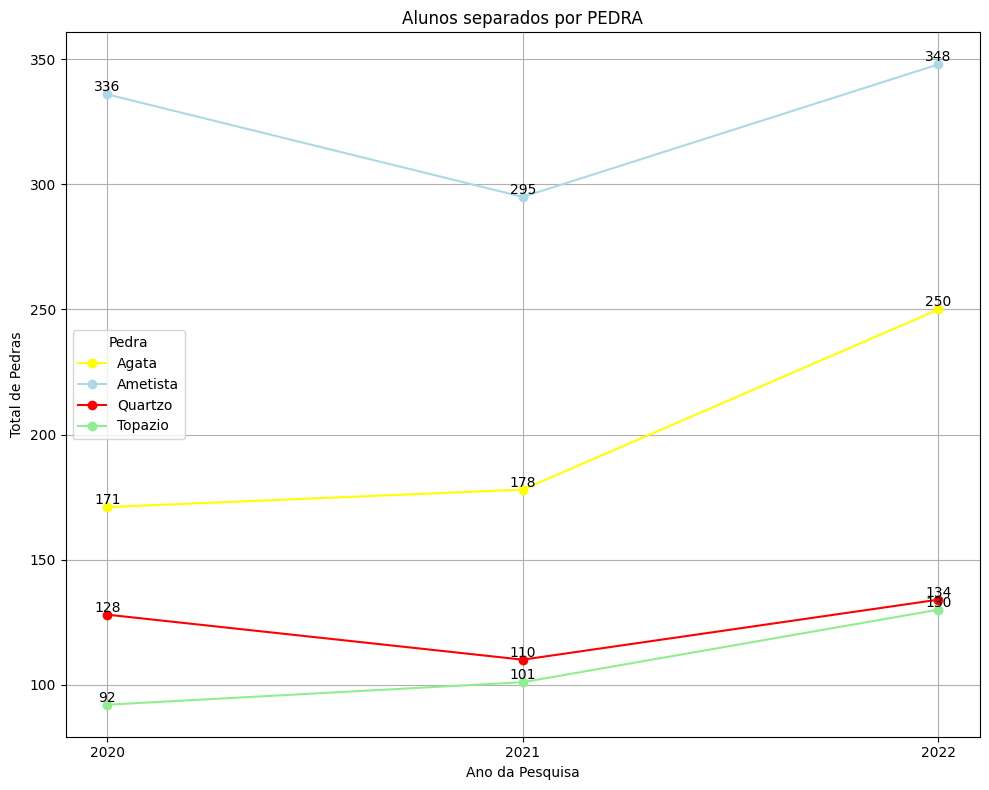

In [202]:
# Agrupar os dados por ano e categoria de pedra
pedra_por_ano = df_alunos_tratado.groupby(['ANO_PESQUISA', 'PEDRA']).size().unstack(fill_value=0)

# Criar o gráfico
plt.figure(figsize=(10, 8))

for column in pedra_por_ano.columns:
    plt.plot(
        pedra_por_ano.index,
        pedra_por_ano[column],
        marker='o',
        label=column,
        color=cores.get(column, 'black')  # Usa a cor definida ou preto como padrão
    )
    for i, count in enumerate(pedra_por_ano[column]):
        plt.text(pedra_por_ano.index[i], count, str(count), ha='center', va='bottom')

# Configurações do gráfico
plt.title('Alunos separados por PEDRA')
plt.xlabel('Ano da Pesquisa')
plt.ylabel('Total de Pedras')
plt.legend(title='Pedra')
plt.grid(True)
plt.xticks(pedra_por_ano.index)
plt.tight_layout()
plt.show()


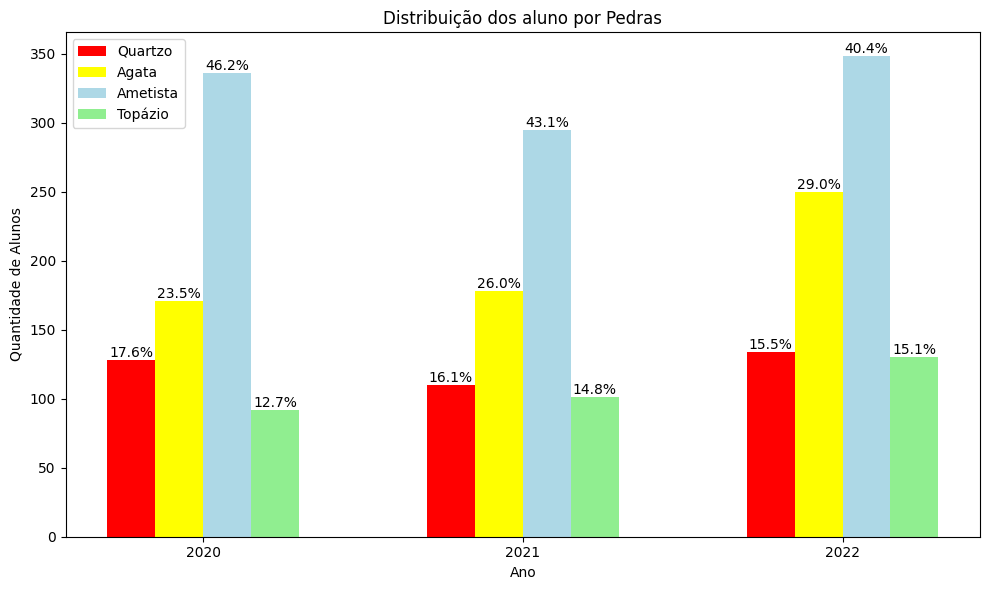

In [203]:
# Filtrando os dados
anos = df_alunos_tratado['ANO_PESQUISA'].unique()
Quartzo = df_alunos_tratado[df_alunos_tratado['PEDRA'] == 'Quartzo'].groupby('ANO_PESQUISA').size()
Ametista = df_alunos_tratado[df_alunos_tratado['PEDRA'] == 'Ametista'].groupby('ANO_PESQUISA').size()
Agata = df_alunos_tratado[df_alunos_tratado['PEDRA'] == 'Agata'].groupby('ANO_PESQUISA').size()
Topazio = df_alunos_tratado[df_alunos_tratado['PEDRA'] == 'Topazio'].groupby('ANO_PESQUISA').size()

# Criar um dataframe com os valores contados
df_pedras = (
    pd.DataFrame({
        'ANO_PESQUISA': anos
    })
    .merge(Quartzo.rename("Quartzo"), on="ANO_PESQUISA", how="left")
    .merge(Ametista.rename("Ametista"), on="ANO_PESQUISA", how="left")
    .merge(Agata.rename("Agata"), on="ANO_PESQUISA", how="left")
    .merge(Topazio.rename("Topazio"), on="ANO_PESQUISA", how="left")
    .fillna(0)  # Substitui valores NaN por 0
)

# Calcular total de pedras por ano
total_pedra = df_pedras[['Quartzo', 'Ametista', 'Agata', 'Topazio']].sum(axis=1)

# Definir largura das barras e posição no eixo X
bar_width = 0.15
mes_index = np.arange(len(anos))

# Criar figura
plt.figure(figsize=(10, 6))
b1 = plt.bar(mes_index, df_pedras["Quartzo"], bar_width, color=cores["Quartzo"], label="Quartzo")
b2 = plt.bar(mes_index + bar_width, df_pedras["Agata"], bar_width, color=cores["Agata"], label="Agata")
b3 = plt.bar(mes_index + 2 * bar_width, df_pedras["Ametista"], bar_width, color=cores["Ametista"], label="Ametista")
b4 = plt.bar(mes_index + 3 * bar_width, df_pedras["Topazio"], bar_width, color=cores["Topazio"], label="Topázio")

# Função para adicionar porcentagens corretamente
def add_percentages(bars, valores, total):
    for bar, valor, total_valor in zip(bars, valores, total):
        height = bar.get_height()
        if total_valor > 0:
            percentage = (valor / total_valor) * 100
            plt.text(bar.get_x() + bar.get_width()/2., height, f'{percentage:.1f}%', ha='center', va='bottom')

# Adicionando porcentagens
add_percentages(b1, df_pedras["Quartzo"], total_pedra)
add_percentages(b2, df_pedras["Agata"], total_pedra)
add_percentages(b3, df_pedras["Ametista"], total_pedra)
add_percentages(b4, df_pedras["Topazio"], total_pedra)

# Ajustando rótulos
plt.title('Distribuição dos aluno por Pedras')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Alunos')
plt.xticks(mes_index + 1.5 * bar_width, anos)

# Adicionando legenda
plt.legend()

# Exibir gráfico
plt.tight_layout()
plt.show()

### 6.2 - Analise Classificação do Aluno por media idade



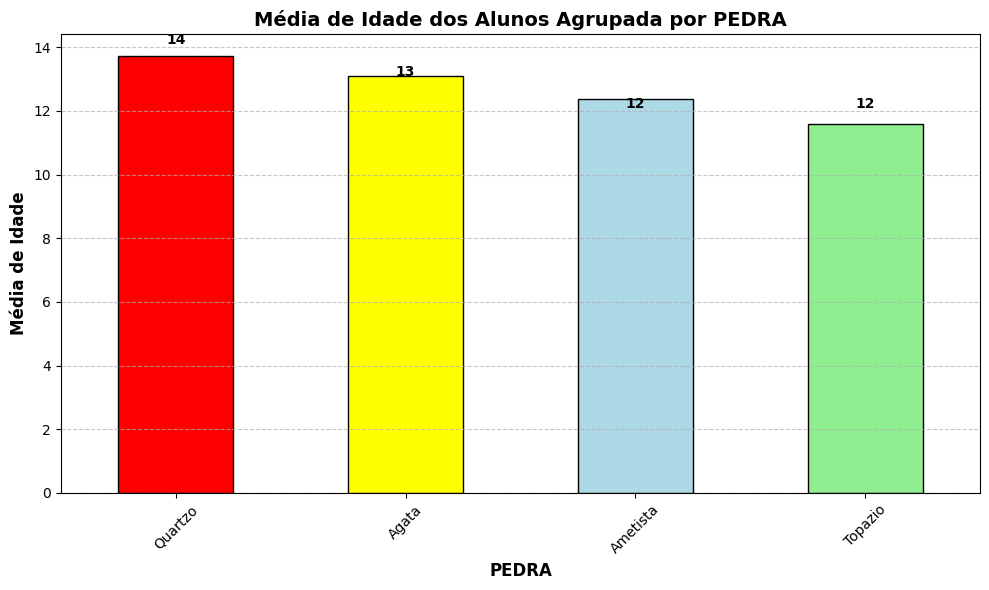

In [207]:
# Calcular a média da idade dos alunos agrupada pela coluna "PEDRA"
media_idade_por_pedra = df_alunos_tratado.groupby("PEDRA")["IDADE_ALUNO"].mean().dropna()

# Definir a ordem desejada das pedras e suas cores correspondentes
ordem_pedras = ["Quartzo", "Agata", "Ametista", "Topazio"]

# Ordenar os dados para garantir que sigam a ordem definida
media_idade_por_pedra = media_idade_por_pedra.reindex(ordem_pedras)

# Criar a lista de cores seguindo a ordem correta
cores_lista = [cores[pedra] for pedra in ordem_pedras]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
barras = media_idade_por_pedra.plot(kind="bar", color=cores_lista, edgecolor="black")

# Adicionar os valores acima das barras (agora arredondados para inteiro)
for bar in barras.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        round(bar.get_height()),
        f"{round(bar.get_height()):.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Configurações do gráfico
plt.title("Média de Idade dos Alunos Agrupada por PEDRA", fontsize=14, fontweight="bold")
plt.xlabel("PEDRA", fontsize=12, fontweight="bold")
plt.ylabel("Média de Idade", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()
